<a href="https://colab.research.google.com/github/Moussa976/eval_python/blob/master/netflix_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

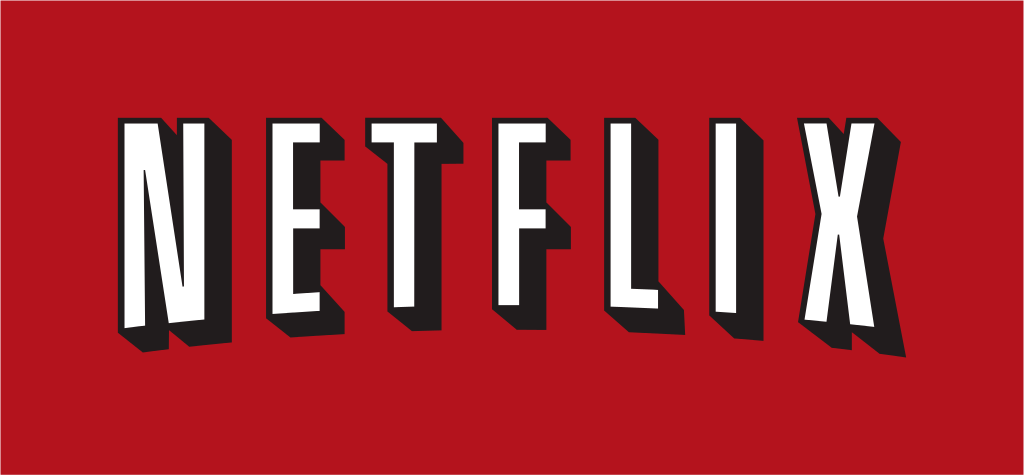
#Netflix Movies and TV Shows

## L'importation des données netflix

In [32]:
#Importation des librairies
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np 


In [33]:
#Lien de la data 
#https://www.kaggle.com/shivamb/netflix-shows
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/exos_graphs'
# import du fichier netflix_titles.csv, on précise ici les colonnes utilisés
data = pd.read_csv(root_path+"/netflix_titles.csv", usecols = ['show_id','type','title','director','cast','country','date_added','release_year','rating','duration','listed_in','description'])
print("dataset loaded")
data.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
dataset loaded


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


##Informations sur le contenu de notre dataset

In [12]:
# informations sur le contenu de notre dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


Nous pouvons observer qu'on a 6234 entrées sur le contenu de notre dataset et assez peu de colonnes.


Les colonnes correspondent à:

 - **show_id**: correspond à l'identifiant du nouvelle entrée
 - **type** :  correspond au type de programme entré (Movie ou TV Show)
 - **title** : corrspond au titre 
 - **director** : correspond au nom de directeur 
 - **cast** : correspond au noms des acteurs
 - **country** : correspond au nom du pays
 - **date_added** : correspond à la date ajout
 - **release_year** : correspond à l'année sortie
 - **rating** : correspond à l'audimat 
 - **duration** : correspond à la durée du film ou de la saison
 - **listed_in** : correspond à la catégorie d'âge 
 - **description** : correspond à la description du film ou série

## Movies and TV Shows

Dans la partie suivante nous allons nous focaliser sur les différents types de programmes du contenu de Netflix tels que **TV Show** et **Movie**. 

In [13]:
# on liste les valeurs possibles des types 
data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [21]:
# On crée le dataset Movie
movie = data[data['type'] == 'Movie'].copy()
# On crée de dataset TV Show
tv_show = data[data['type'] == 'TV Show'].copy()

In [ ]:
# informations sur le contenu de notre dataset Movie et TV Show
print(movie.info(), tv_show.info())


In [17]:
print(len(movie.show_id)," movies et ",len(tv_show.show_id)," tv shows") # Se rassurer qu'il y a 4265 Movie et 1969 TV Show

4265  movies et  1969  tv shows


In [ ]:
# Affichages des Movies
movie.head()

In [ ]:
# Affichages des TV Shows
tv_show.head()

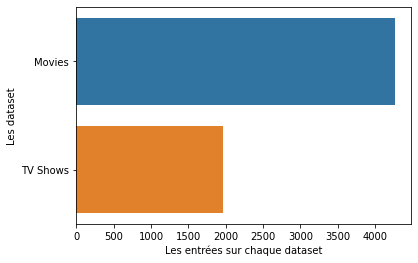

In [28]:
# Les entrées sur chaque dataset sur un graphique à barres
lesdataset = pd.DataFrame({'cat': ['Movies', 'TV Shows'], 'val': [len(movie.show_id), len(tv_show.show_id)]})
ax = sns.barplot(x='val', y='cat', data=lesdataset)
ax.set(xlabel='Les entrées sur chaque dataset', ylabel='Les dataset')
plt.show()

# Les entrées sur chaque dataset sur un graphique en anneau
# plt.pie(data['type'].value_count(), labels=['Movies', 'TV Shows'], explode = [0,0.1],startangle=90, labeldistance=1.2)
# plt.title('Types de programme')
# plt.legend()
# plt.show()

In [23]:
# Conversion de la colonne 'date_added' au format date
movie['date_added'] = pd.to_datetime(movie['date_added'])
tv_show['date_added'] = pd.to_datetime(tv_show['date_added'])


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


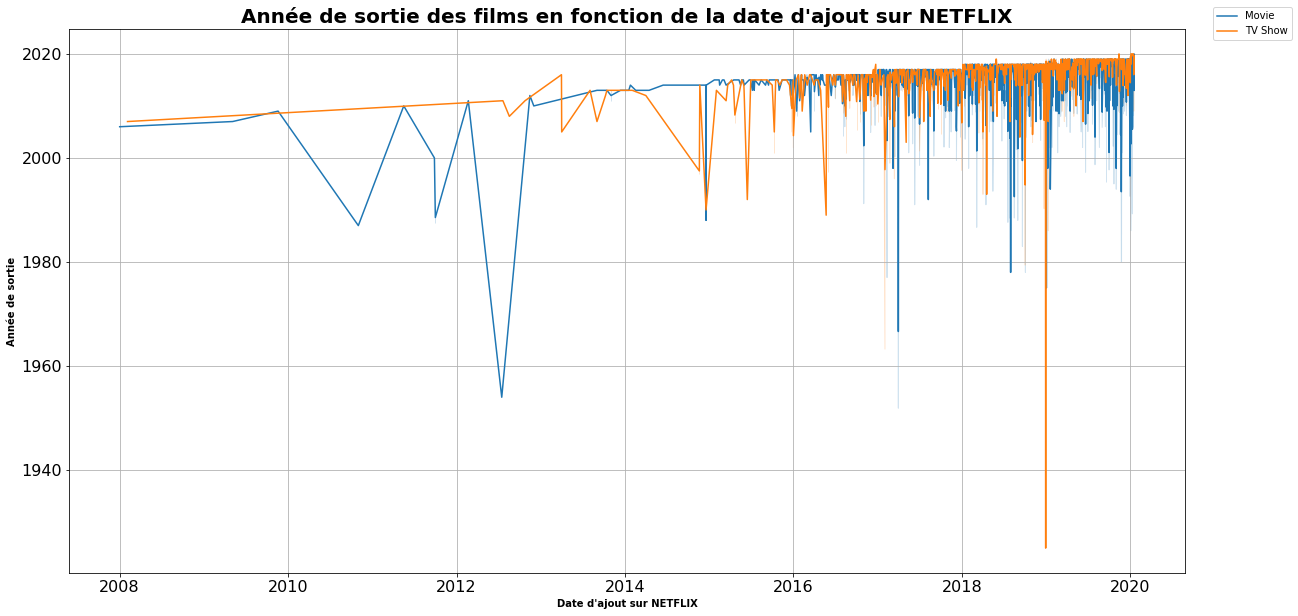

In [24]:
# utilisation de Line plot
fig, ax = plt.subplots(figsize=(20, 10))
# utilisation de grille
plt.grid()
# Affichage du graphe pour le dataset Movie
sns.lineplot(movie['date_added'], movie['release_year'])
# Affichage du graphe pour le dataset TV Show
sns.lineplot(tv_show['date_added'], tv_show['release_year'])

ax.set_title('Année de sortie des films en fonction de la date d\'ajout sur NETFLIX', fontsize = 20, loc='center',fontdict=dict(weight='bold'))
ax.set_xlabel('Date d\'ajout sur NETFLIX', fontsize = 10, fontdict=dict(weight='bold'))
ax.set_ylabel('Année de sortie', fontsize = 10, fontdict=dict(weight='bold'))
ax.legend(labels = ["Movie","TV Show"], bbox_to_anchor=(1.1, 1.05))

plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


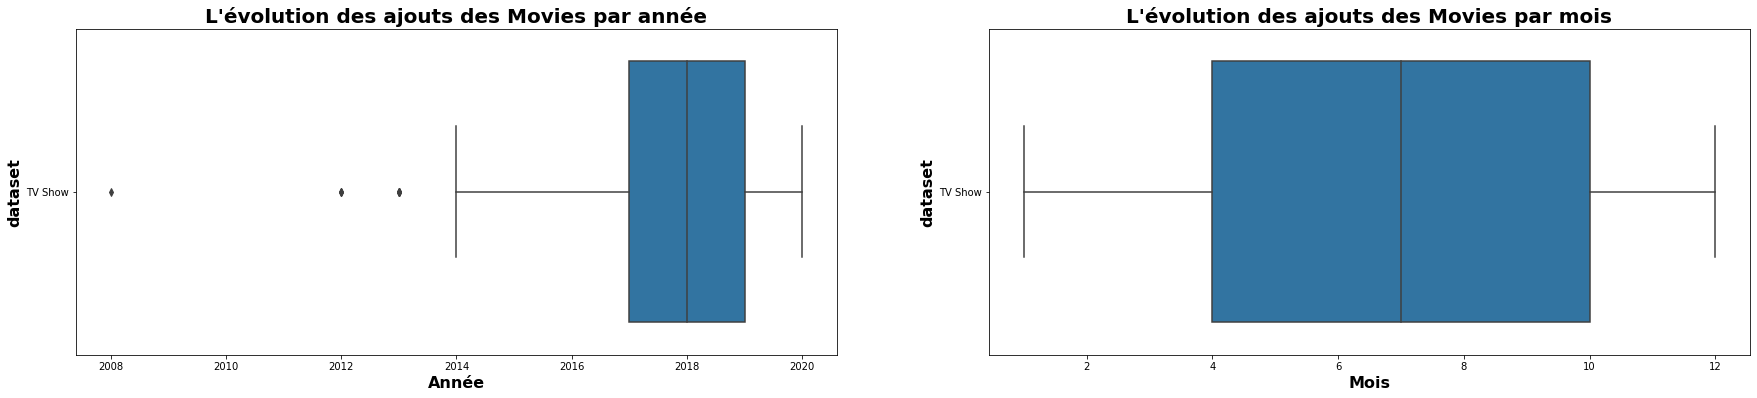

In [26]:
# Fonction qui retourne les évolutions des ajouts des movies ou tv shows par année et par mois

def boxPlot(ledataset, nomType):
  variable = "type"

  ledataset['Year'] = ledataset['date_added'].dt.year
  ledataset['Month'] = ledataset['date_added'].dt.month

  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))

  sns.boxplot(ledataset['Year'], ledataset[variable], ax=ax[0])
  ax[0].set_title('L\'évolution des ajouts des '+str(nomType)+' par année', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
  ax[0].set_xlabel('Année', fontsize = 16, fontdict=dict(weight='bold'))
  ax[0].set_ylabel('dataset', fontsize = 16, fontdict=dict(weight='bold'))

  sns.boxplot(ledataset['Month'], ledataset[variable], ax=ax[1])
  ax[1].set_title('L\'évolution des ajouts des '+str(nomType)+' par mois', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
  ax[1].set_xlabel('Mois', fontsize = 16, fontdict=dict(weight='bold'))
  ax[1].set_ylabel('dataset', fontsize = 16, fontdict=dict(weight='bold'))

boxPlot(tv_show,"Movies")

On constate que Netflix s'est de plus en plus concentré sur les émissions de télévision et des films à partir de 2015.

On aperçoit, une très grosse différence avant 2015. 

In [ ]:
# Les valeurs vides
movie.isna().sum()

show_id           0
type              0
title             0
director        128
cast            360
country         195
date_added        1
release_year      0
rating            8
duration          0
listed_in         0
description       0
dtype: int64

Nous constatons qu'il manque 128 noms de **director** (Réalisateurs), 360 noms de **cast**, 195 noms de pays et une date d'ajout sur netflix. 

In [ ]:
""" Fonction qui permet de calculer le % de données manquantes"""
def donnees_manquantes(dataset, liste_colonnes):
    for colonne in liste_colonnes:
        pourcentage = round((dataset[colonne].isnull().sum()/dataset.shape[0]) * 100, 2)
        print ("Données manquantes pour {}: {}%".format(colonne,pourcentage))
    
donnees_manquantes(movie, ['director', 'cast', 'country','date_added' ])

Données manquantes pour director: 3.0%
Données manquantes pour cast: 8.44%
Données manquantes pour country: 4.57%
Données manquantes pour date_added: 0.02%


## Analyse des données sur les différents pays


In [ ]:
data['country'].unique()

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


Dans cette partie, nous allons analysé les données dans les différents pays.

In [ ]:
# Les Top 10 des pays qui ont le plus de programme Netflix
plt.figure(figsize=(30,10))
data['country'].value_counts()[:10].plot(kind="barh")
plt.title('Les Top 10 des pays qui ont le plus de programme Netflix', size=20)